In [176]:
import pandas as pd
from matplotlib import pyplot as plt

In [177]:
# import dataset
df = pd.read_csv('car driving risk analysis.csv')

In [178]:
df.head()

,speed,risk
0,200,95
1,90,20
2,300,98
3,110,60
4,240,72


In [179]:
df.describe()

,speed,risk
count,15.000000,15.000000
mean,179.666667,55.800000
std,92.687391,35.827364
min,30.000000,2.000000
25%,102.500000,19.000000
50%,190.000000,60.000000
75%,250.000000,88.000000
max,310.000000,98.000000


In [180]:
df.isnull().sum()

speed    0
risk     0
dtype: int64

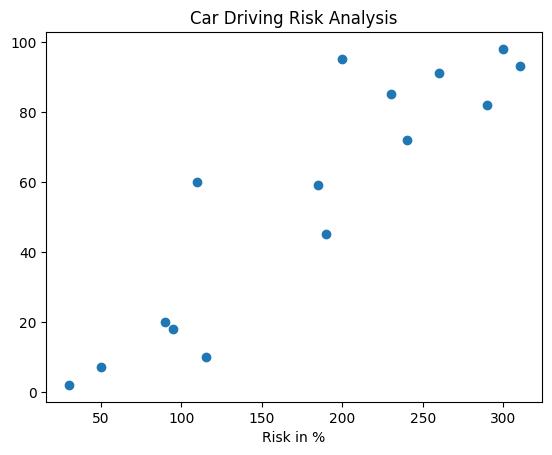

In [181]:
# show scatter diagram for dataset
plt.scatter(df['speed'], df['risk'])
plt.xlabel('Speed')
plt.xlabel('Risk in %')
plt.title('Car Driving Risk Analysis')
plt.show()

## Linear Regression

In [182]:
# import libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [183]:
# create object
reg = LinearRegression()

In [184]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=1)

In [185]:
x = df[['speed']]

In [186]:
y = df[['risk']]

In [187]:
x_train.head()

,speed
1,90
13,95
0,200
14,30
9,260


In [188]:
y_train.head()

,risk
1,20
13,18
0,95
14,2
9,91


In [189]:
x_test.head()

,speed
3,110
7,230
6,50
2,300
10,290


In [190]:
y_test.head()

,risk
3,60
7,85
6,7
2,98
10,82


In [191]:
x.mean()

speed    179.666667
dtype: float64

In [192]:
y.mean()

risk    55.8
dtype: float64

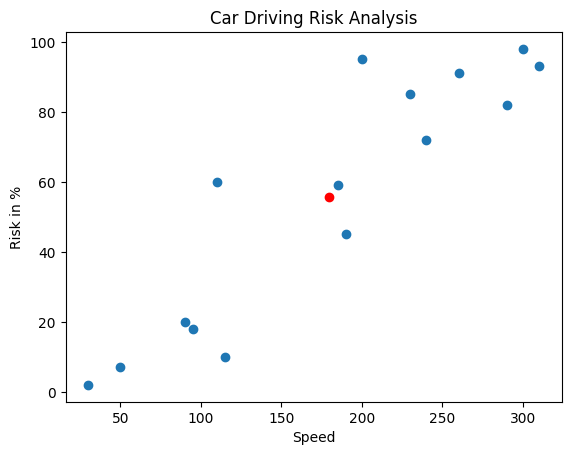

In [193]:
# show best fit line
plt.scatter(x.mean(), y.mean(), color = 'red')

# show scatter diagram for all dataset
plt.scatter(df['speed'], df['risk'])
plt.xlabel('Speed')
plt.ylabel('Risk in %')
plt.title('Car Driving Risk Analysis')
plt.show()

In [194]:
# train the model
reg.fit(x, y)

LinearRegression()

In [195]:
m = reg.coef_
m

array([[0.35131645]])

In [196]:
c = reg.intercept_
c

array([-7.31985478])

In [197]:
# y = mx + c

In [198]:
reg.predict([[150]])

c:\Users\SHAHRIAR\.pyenv\pyenv-win\versions\3.8.6\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[45.37761211]])

In [199]:
# new predicted y for x
df['predicted_y'] = reg.predict(x)
df.head()

,speed,risk,predicted_y
0,200,95,62.943434
1,90,20,24.298625
2,300,98,98.075079
3,110,60,31.324954
4,240,72,76.996092


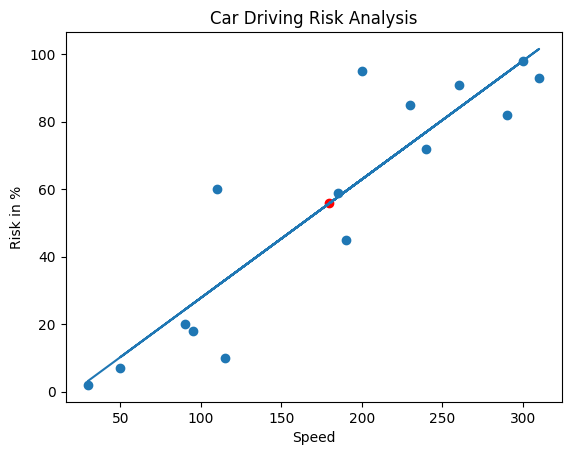

In [200]:
# show predicted_y line
plt.plot(x, reg.predict(x))

# show best fit line
plt.scatter(x.mean(), y.mean(), marker= 'o', color = 'red')

# show scatter diagram for all dataset
plt.scatter(df['speed'], df['risk'])
plt.xlabel('Speed')
plt.ylabel('Risk in %')
plt.title('Car Driving Risk Analysis')
plt.show()

In [201]:
accuracy = reg.score(x_test, y_test)
accuracy

0.7784812006945199

In [202]:
reg.predict([[142]])

c:\Users\SHAHRIAR\.pyenv\pyenv-win\versions\3.8.6\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[42.56708054]])

## Lose and Cost Function

In [203]:
df.head()

,speed,risk,predicted_y
0,200,95,62.943434
1,90,20,24.298625
2,300,98,98.075079
3,110,60,31.324954
4,240,72,76.996092


In [204]:
# lose calculate
df['lose'] = df['risk'] - df['predicted_y']
df.head()

,speed,risk,predicted_y,lose
0,200,95,62.943434,32.056566
1,90,20,24.298625,-4.298625
2,300,98,98.075079,-0.075079
3,110,60,31.324954,28.675046
4,240,72,76.996092,-4.996092


In [205]:
# MSE & MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [206]:
mse = mean_squared_error(df['risk'], df['predicted_y'])
mse

208.3916597380042

In [207]:
mae = mean_absolute_error(df['risk'], df['predicted_y'])
mae

10.740343292130891

In [208]:
sum(abs(df['lose'])) / len(x)

10.740343292130891

In [209]:
# check performance
reg.score(x, y)

0.8260542394120296

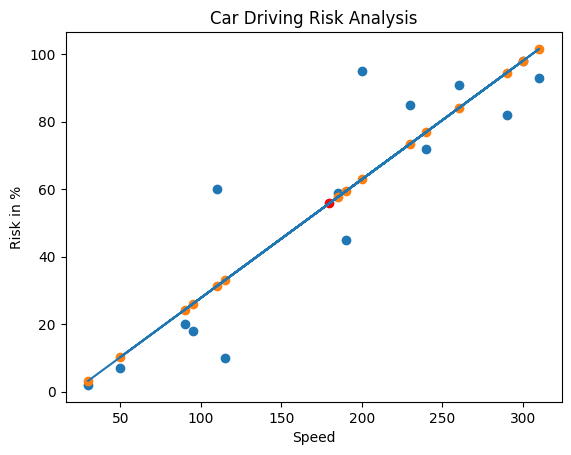

In [210]:
# show predicted y line
plt.plot(x, reg.predict(x))

# show best fit line
plt.scatter(x.mean(), y.mean(), color = 'red')

# show scatter diagram for all dataset
plt.scatter(df['speed'], df['risk'])
plt.scatter(df['speed'], df['predicted_y'])
plt.xlabel('Speed')
plt.ylabel('Risk in %')
plt.title('Car Driving Risk Analysis')
plt.show()

## R2 Square Value / Accuray for Regression

In [211]:
reg.score(x_test, y_test)

0.7784812006945199

In [212]:
reg.score(x, y)

0.8260542394120296

In [213]:
df.head()

,speed,risk,predicted_y,lose
0,200,95,62.943434,32.056566
1,90,20,24.298625,-4.298625
2,300,98,98.075079,-0.075079
3,110,60,31.324954,28.675046
4,240,72,76.996092,-4.996092


In [214]:
from sklearn.metrics import r2_score

r2_score(y, reg.predict(x))

0.8260542394120296